# Introduction
The objective is to create a linear regression model for a given dataset( House Sales in King County, USA). The overall idea of regression is to examine two things: (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable? (2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable? These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.<br>

Linear Regression Analysis consists of more than just fitting a linear line through a cloud of data points. It consists of 3 stages – (1) analyzing the correlation and directionality of the data, (2) estimating the model, i.e., fitting the line, and (3) evaluating the validity and usefulness of the model.

## Regressions Performed
### Simple Linear Regression:


1) 'No_of_Bedrooms' vs 'Sale Price'<br>
2) 'Overall Grade' vs 'Sale Price'

### Multiple Regression:


1) 'No_of_Bedrooms','Overall Grade', 'Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'<br>
2) 'No_of_Bedrooms','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)', 'No of Floors','Overall Grade','Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)','Latitude','Living Area after Renovation (in Sqft)'

### Polynomial Regression:

1) degree=2<br>
2) degree=3



# Data

## Description

In this dataset we have to predict the **sales price of houses**. Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

The dataset cantains 20 house features plus the Sale Price, along with 21609 observations.

The description for the 20 features is given below:

1. Id :- It is the unique numeric number assigned to each house being sold.
2. Date House was Sold:- It is the date on which the house was sold out.
3. Sale Price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
4. No_of_Bedrooms :- It determines number of bedrooms in a house.
5. No_of_Bathrooms :- It determines number of bathrooms in a bedroom of a house.
6. Flat Area (in Sqft) :- It is the measurement variable which determines the measurement of house in square foot.
7. Lot Area (in Sqft): It is also the measurement variable which determines square foot of the lot.
8. No of Floors: It determines total floors means levels of house.
9. Waterfront View: This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
10. No of Times Visited : This feature determines whether a house has been viewed or not 0 means no 1 means yes.
11. Condition of the House : It determines the overall condition of a house on a scale of 1 to 5.
12. Overall Grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11
13. Area of the House from Basement (in Sqft) : It determines square footage of house apart from basement.
14. Basement Area (in Sqft) : It determines square footage of the basement of the house.
15. Age of House (in Years) : It detrmines the date of building of the house.
16. Renovated Year : It detrmines year of renovation of house.
17. Zipcode : It determines the zipcode of the location of the house.
18. Latitude : It determines the latitude of the location of the house.
19. Longitude : It determines the longitude of the location of the house.
20. Living Area after Renovation (in Sqft) : Living room area in 2015(implies-- some renovations)
21. Lot Area after Renovation (in Sqft) : lotSize area in 2015(implies-- some renovations)

By observing the data, we can know that the **price is dependent on various features** like bedrooms(which is most dependent feature), bathrooms, sqft_living(second most important feature), sqft_lot, floors etc. The price is also dependent on the location of the house where it is present. The other features like waterfront, view are less dependent on the price. Of all the records, there are **no missing values, which helps us creating better model.** 

First, we **import** the required libraries like pandas, numpy, seaborn, matplotlib. Now import the **csv file.** Now we should get to know how the data is, what datatype using info function. We observe that date is in 'object' format. To know the no of rows and columns we use shape function. Describe the dataframe to know the mean, minumum, ,maximum, standard deviation, percentiles. 

Then plot graphs for visualization and then we do simple regression using 'bedrooms', multiple regression and polynomial regression. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Raw_Housing_Data.csv")

In [3]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [5]:
data.shape

(21609, 21)

In [6]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [7]:
data['No of Bedrooms'].value_counts()

3     9823
4     6881
2     2759
5     1601
6      271
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: No of Bedrooms, dtype: int64

In [8]:
data['Waterfront View'].value_counts()

No     21446
Yes      163
Name: Waterfront View, dtype: int64

In [9]:
data['Overall Grade'].value_counts()

7     8979
8     6066
9     2615
6     2038
10    1623
5      242
4       29
2       13
3        3
1        1
Name: Overall Grade, dtype: int64

In [10]:
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [11]:
data = data.rename(columns = {'No of Bedrooms':'No_of_Bedrooms'})

C:\Users\Ashutosh Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No_of_Bedrooms', ylabel='count'>

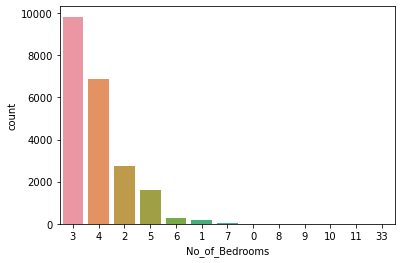

In [12]:
sns.countplot(data.No_of_Bedrooms,order=data['No_of_Bedrooms'].value_counts().index)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'house prices by sqft_living'}, xlabel='Flat Area (in Sqft)', ylabel='Sale Price'>

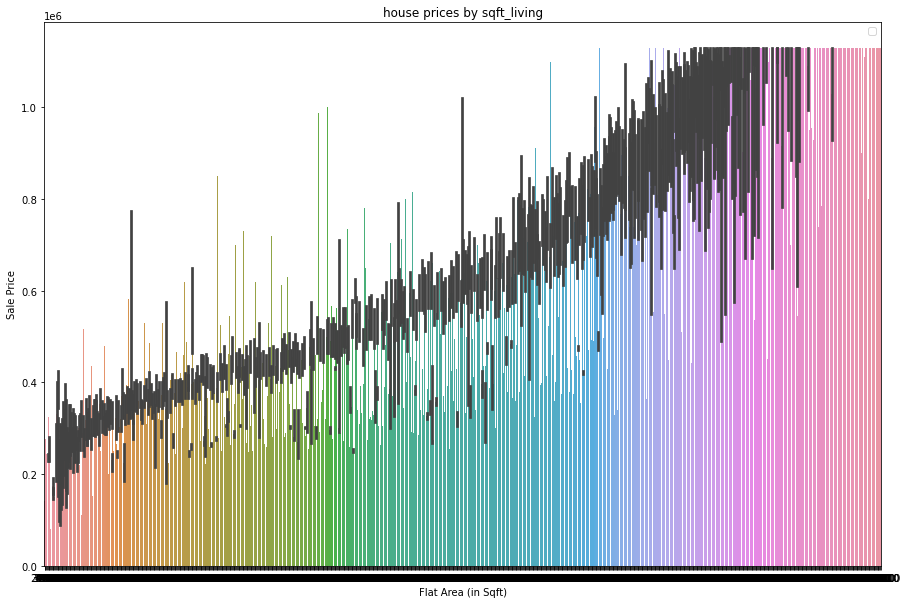

In [13]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title('house prices by sqft_living')
plt.xlabel('Flat Area (in Sqft) ')
plt.ylabel('Sale Price')
plt.legend()
sns.barplot(x='Flat Area (in Sqft)',y='Sale Price',data=data)


No handles with labels found to put in legend.


<AxesSubplot:title={'center':'House prices by Lot Area '}, xlabel='Area of the House from Basement (in Sqft)', ylabel='Sale Price'>

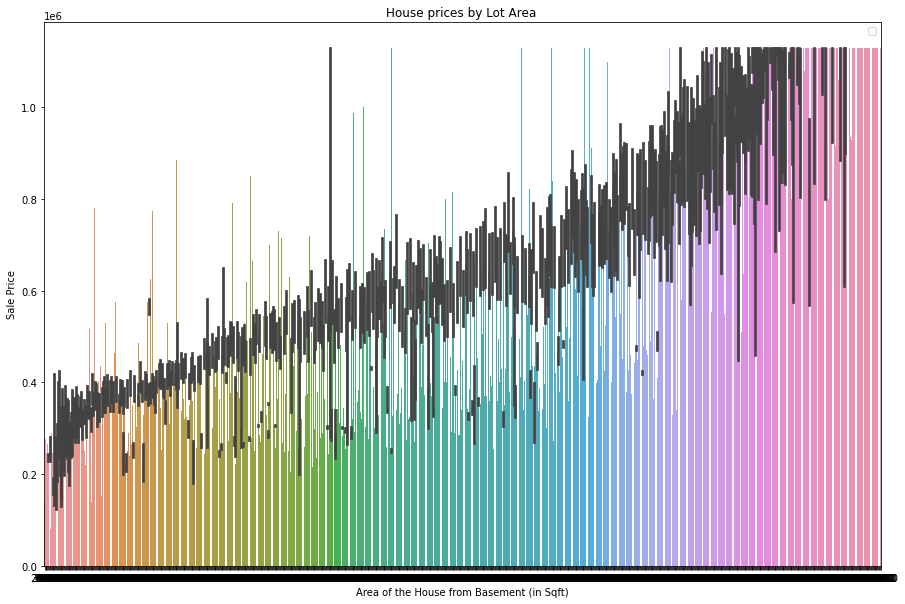

In [14]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("House prices by Lot Area ")
plt.xlabel('Area of the House from Basement (in Sqft)')
plt.ylabel('Sale Price')
plt.legend()
sns.barplot(x='Area of the House from Basement (in Sqft)',y='Sale Price',data=data)

(array([1.8248e+04, 3.2530e+03, 1.0100e+02, 5.0000e+00, 2.0000e+00]),
 array([  290.,  2940.,  5590.,  8240., 10890., 13540.]),
 <BarContainer object of 5 artists>)

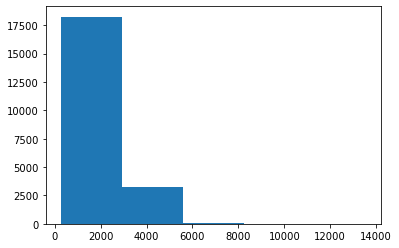

In [15]:
plt.hist('Flat Area (in Sqft)',data=data,bins=5)

C:\Users\Ashutosh Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flat Area (in Sqft)', ylabel='Density'>

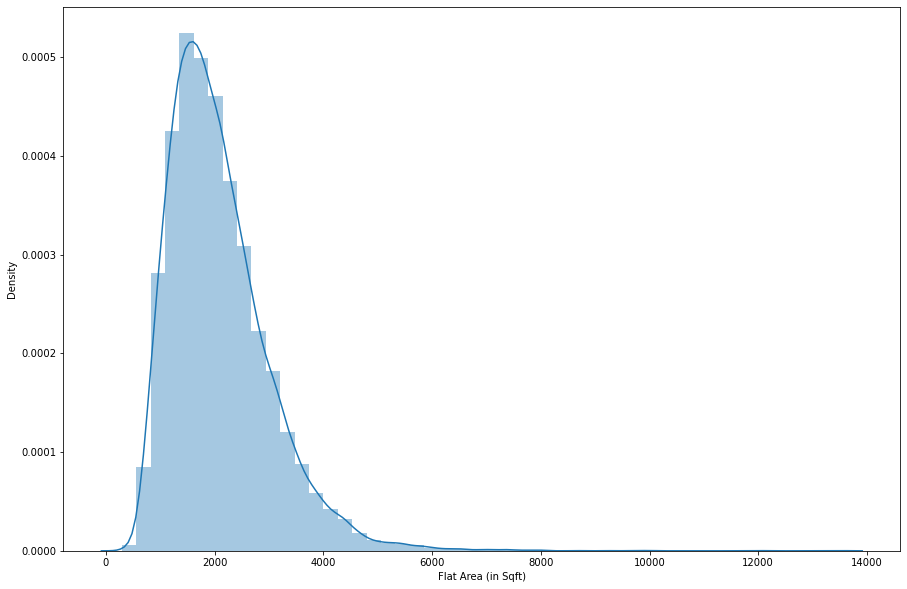

In [16]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(data['Flat Area (in Sqft)'],hist=True,kde=True,rug=False,label='Flat Area (in Sqft)',norm_hist=True)

C:\Users\Ashutosh Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area of the House from Basement (in Sqft)', ylabel='Density'>

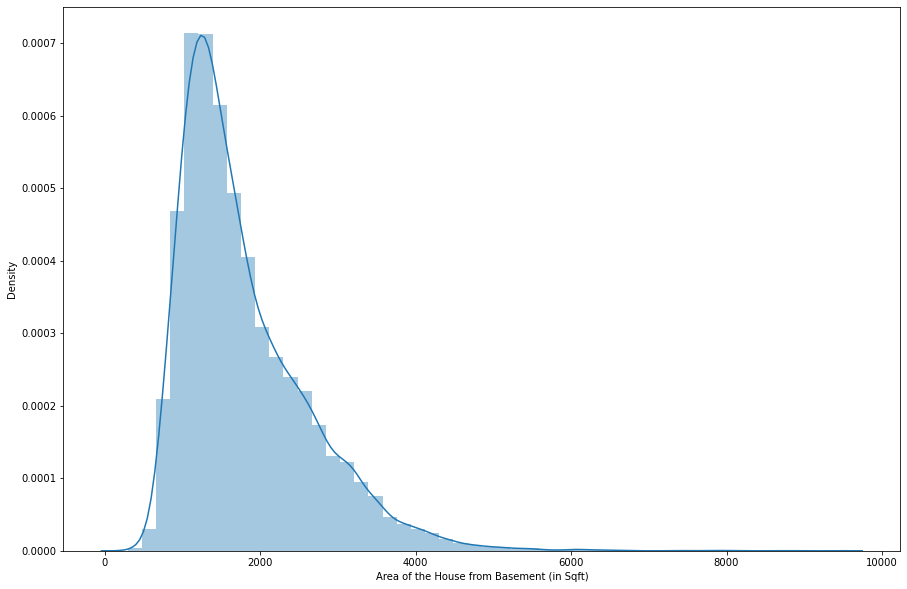

In [17]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(data['Area of the House from Basement (in Sqft)'],hist=True,kde=True,rug=False,label='Area of the House from Basement (in Sqft)',norm_hist=True)

In [18]:
print('Mean',round(data['Flat Area (in Sqft)'].mean(),2))
print('Median',data['Flat Area (in Sqft)'].median())
print('Mode',data['Flat Area (in Sqft)'].mode()[0])

Mean 2079.87
Median 1910.0
Mode 1300.0


In [19]:
len(data[data['Flat Area (in Sqft)']==1300])

138

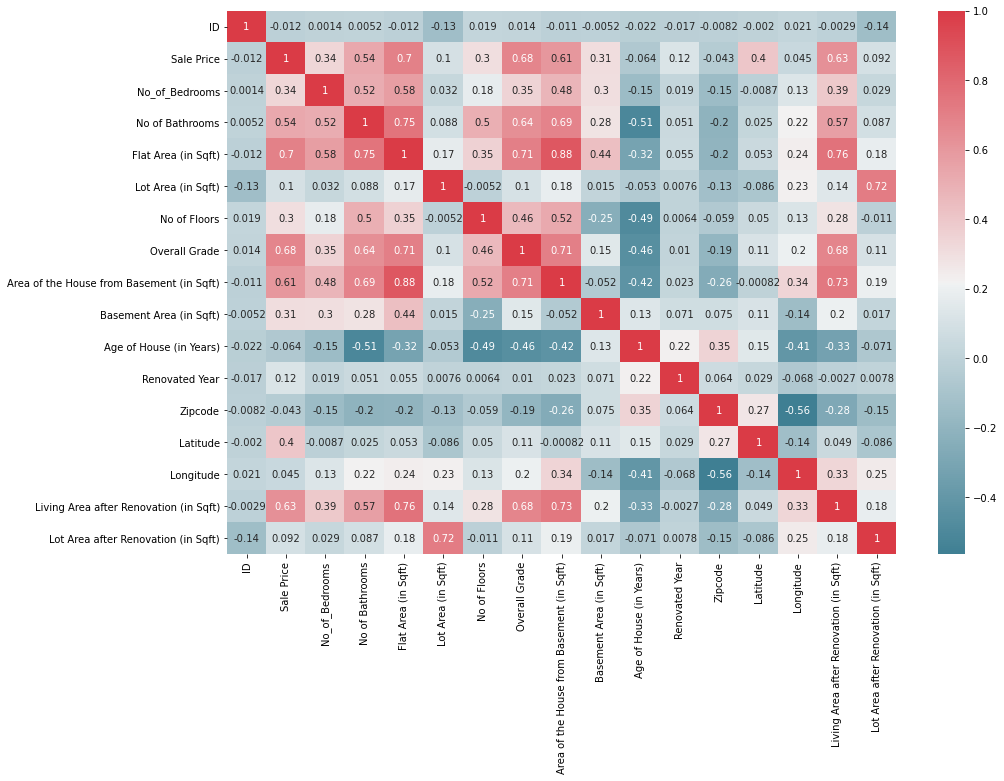

In [20]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(data.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(data)

# Simple Linear Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [22]:
train_data,test_data=train_test_split(data,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['Flat Area (in Sqft)']).reshape(-1,1)
y_train=np.array(train_data['Sale Price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['Flat Area (in Sqft)']).reshape(-1,1)
y_test=np.array(test_data['Sale Price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

linear model
Sqaured mean error 179351.17
R squared training 0.485
R sqaured testing 0.476
intercept [118313.88852279]
coefficient [[189.53570925]]


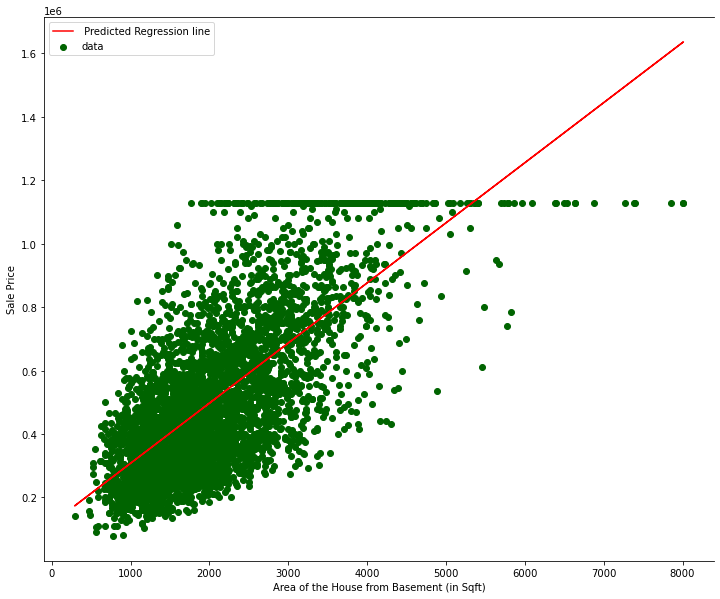

In [23]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Area of the House from Basement (in Sqft)')
plt.ylabel('Sale Price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [24]:
train_data,test_data=train_test_split(data,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['Overall Grade']).reshape(-1,1)
y_train=np.array(train_data['Sale Price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['Overall Grade']).reshape(-1,1)
y_test=np.array(test_data['Sale Price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('squared mean error',round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3))
print('intercept',reg.intercept_)
print('coeeficient',reg.coef_)

linear model
squared mean error 179898.4
R squared training 0.461
R squared testing 0.473
intercept [-662513.16923683]
coeeficient [[154165.64903091]]


# Multiple Regression

<AxesSubplot:xlabel='No of Bathrooms', ylabel='Sale Price'>

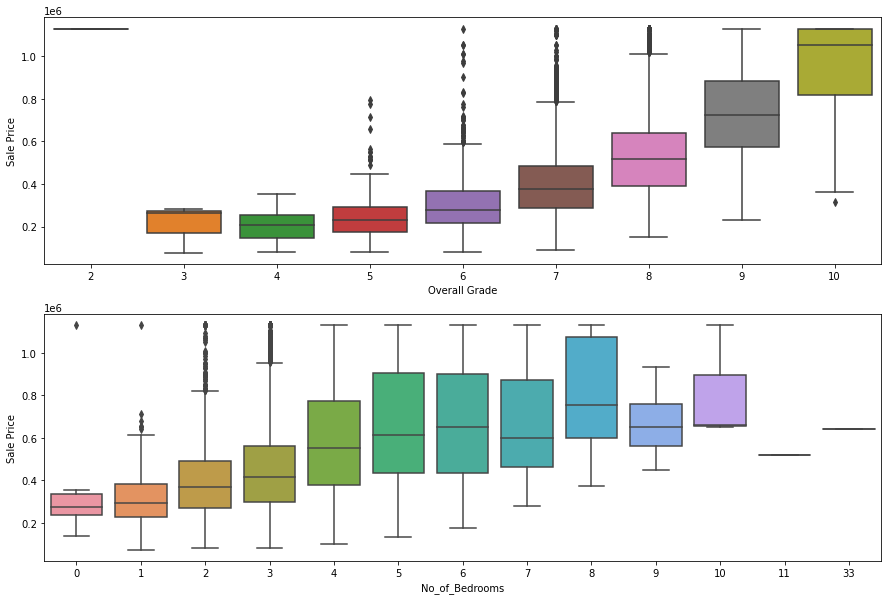

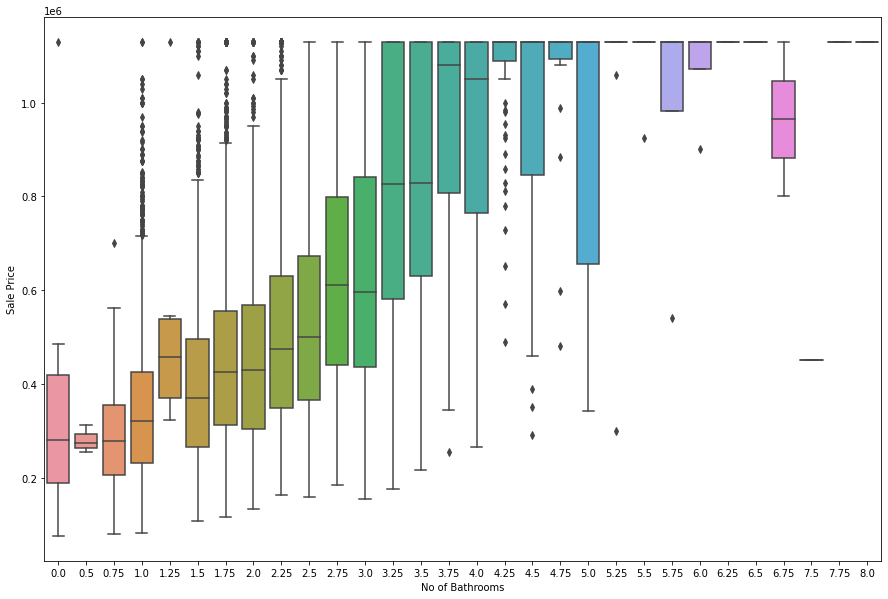

In [25]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=train_data['Overall Grade'],y=train_data['Sale Price'],ax=ax[0])
sns.boxplot(x=train_data['No_of_Bedrooms'],y=train_data['Sale Price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=train_data['No of Bathrooms'],y=train_data['Sale Price'])

In [26]:
features1=['No_of_Bedrooms','Overall Grade','Flat Area (in Sqft)','Area of the House from Basement (in Sqft)']
reg=linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['Sale Price'])
pred=reg.predict(test_data[features1])
print('complex_model 1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(train_data[features1],train_data['Sale Price']),3))
print('R squared training', round(reg.score(test_data[features1],test_data['Sale Price']),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

complex_model 1
mean squared error(MSE) 165125.13
R squared training 0.566
R squared training 0.556
Intercept:  -364136.5941897676
Coefficient: [-1.83732931e+04  9.02983026e+04  1.66654138e+02 -5.38002447e+01]


In [27]:
features1 = ['No_of_Bedrooms','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)',
             'No of Floors','Overall Grade','Area of the House from Basement (in Sqft)',
             'Basement Area (in Sqft)','Latitude','Living Area after Renovation (in Sqft)']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['Sale Price'])
pred = reg.predict(test_data[features1])
print('Complex Model_2')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['Sale Price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['Sale Price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Complex Model_2
Mean Squared Error (MSE)  139691.67
R-squared (training)  0.682
R-squared (testing)  0.682
Intercept:  -28994007.645038024
Coefficient: [-1.12866435e+04 -7.22919559e+03  1.22024366e+02  7.80864416e-02
  2.01980578e+03  6.81252097e+04 -2.27507891e+01  1.19657690e+01
  6.03696817e+05  5.41951700e+01]


# Polynomial Regression

In [28]:
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['Sale Price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['Sale Price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['Sale Price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['Sale Price']), 3))

Complex Model_3
Mean Squared Error (MSE)  128665.26
R-squared (training)  0.739
R-squared (testing)  0.73


In [29]:
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['Sale Price'])
polypred=poly.predict(xtest_poly)

print('complex model_4')
mean_squared_error=metrics.mean_squared_error(test_data['Sale Price'],polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['Sale Price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['Sale Price']), 3))

complex model_4
Mean Squared Error (MSE)  199393.79
R-squared (training)  0.731
R-squared (testing)  0.352


# RESULT

We conclue that Polynomial Reression is the best regression solution